In [1422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

In [1424]:
df = pd.read_csv(r"C:\Users\manan\Documents\Data_Analysis_Practice\Startup_Data\startup_data.csv", index_col =  ['Industry', 'Startup Name'])
df.sort_values(by = ['Industry', 'Year Founded', 'Region'], inplace = True)
df['Profitable'] = df['Profitable'].astype(bool)
df

Funding Rounds  Funding Amount (M USD)  \
Industry      Startup Name                                           
AI            Startup_423                2                   48.92   
              Startup_232                5                  155.07   
              Startup_224                4                   15.11   
              Startup_51                 3                  106.48   
              Startup_144                5                   56.05   
              Startup_259                2                  167.08   
              Startup_393                1                  268.92   
              Startup_473                1                   29.03   
              Startup_436                1                  288.25   
              Startup_11                 5                  292.38   
              Startup_185                5                   69.56   
              Startup_387                1                  208.11   
              Startup_425                2                  196.15   
              Startup_233                4                  272.00   
              Startup_281                4                  284.22   
              Startup_434                5                  252.22   
              Startup_303                1                  283.32   
              Startup_148                1                    3.34   
              Startup_6                  5                  103.89   
              Startup_171                2                   37.77   
              Startup_165                3                  176.94   
              Startup_270                4                   38.97   
              Startup_433                4                   61.47   
              Startup_131                2                  121.64   
              Startup_137                5                  156.29   
              Startup_317                4                  272.90   
              Startup_466                2                   21.21   
              Startup_134                5                  161.75   
              Startup_304                1                   31.11   
              Startup_31                 3                  159.13   
              Startup_213                4                  143.26   
              Startup_91                 1                  237.11   
              Startup_82                 4                   23.24   
              Startup_286                4                   17.85   
              Startup_299                2                   76.13   
              Startup_390                5                  201.28   
              Startup_374                1                   63.50   
              Startup_301                5                   48.10   
              Startup_308                5                   89.86   
              Startup_461                3                  180.76   
              Startup_366                3                  272.39   
              Startup_203                2                  269.28   
              Startup_225                1                  160.01   
              Startup_55                 1                  231.41   
              Startup_249                3                   57.17   
              Startup_34                 1                   20.62   
              Startup_362                2                  216.71   
              Startup_277                4                  226.23   
              Startup_462                2                  189.95   
              Startup_313                2                  260.48   
              Startup_430                1                  121.28   
              Startup_273                5                  129.96   
              Startup_117                4                  126.82   
              Startup_45                 5                  148.54   
              Startup_73                 5                   46.82   
              Startup_295             

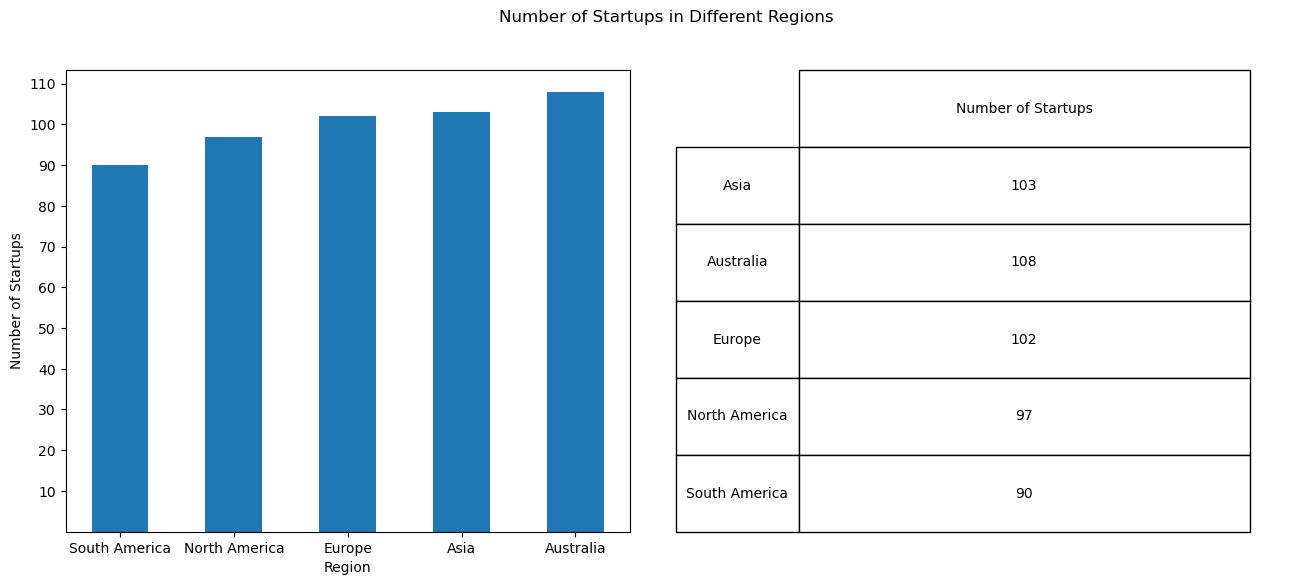

In [1426]:
regions, counts = np.unique(df['Region'], return_counts = True)

data = {
    'Region': regions,
    'Number of Startups': counts
}
startup_data = pd.DataFrame(data)
startup_data.set_index('Region', inplace = True)

sorted_indices = np.argsort(counts)[::1]
sorted_regions = regions[sorted_indices]
sorted_counts = counts[sorted_indices]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))
fig.suptitle('Number of Startups in Different Regions')
ax1.bar(sorted_regions, sorted_counts, width = 0.5)
ax1.tick_params(labelsize =  10)
ax1.set_yticks(np.arange(10, 120, 10))
ax1.set_xlabel('Region')
ax1.set_ylabel('Number of Startups')
ax2.table(
    cellText = startup_data.values, 
    colLabels = startup_data.columns, 
    rowLabels = startup_data.index,
    rowLoc = 'center', 
    loc = 'center', 
    cellLoc = 'center', 
    bbox = [0.1, 0, 0.8, 1]
)
ax2.axis(False)
plt.show()

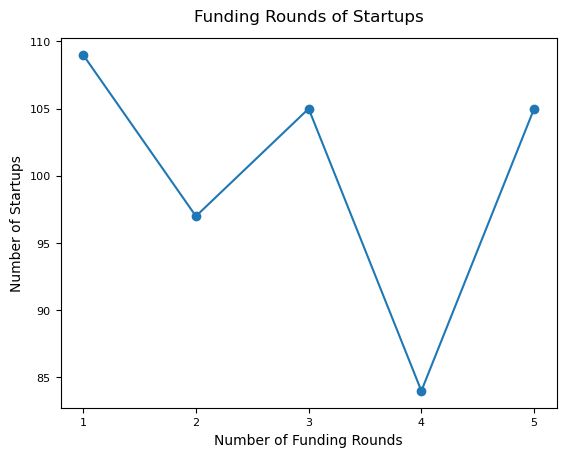

In [1428]:
funding_rounds, counts = np.unique(df['Funding Rounds'], return_counts = True)

plt.figure()
plt.plot(funding_rounds, counts, marker = 'o')
plt.xticks(np.arange(1, 6, 1), fontsize =  8)
plt.yticks(fontsize =  8)
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Number of Startups')
plt.title('Funding Rounds of Startups', pad = 12)
plt.show()

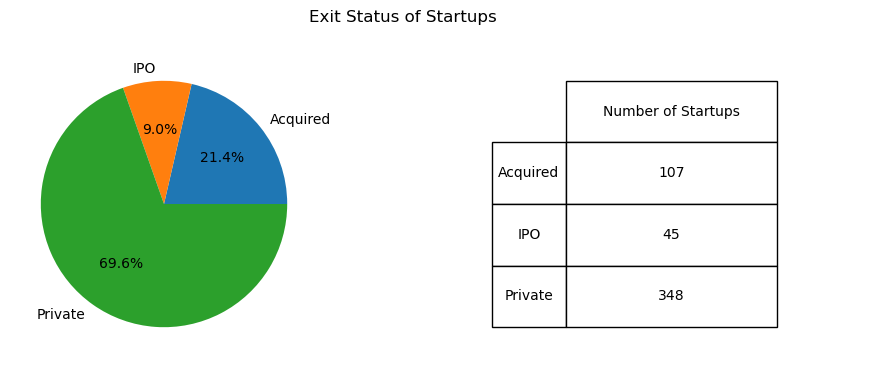

In [1430]:
exit_status, counts = np.unique(df['Exit Status'], return_counts = True)

data = {
    'Exit Status': exit_status,
    'Number of Startups': counts
}
startup_data = pd.DataFrame(data)
startup_data.set_index('Exit Status', inplace = True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
fig.suptitle('Exit Status of Startups')
ax1.pie(counts, labels = exit_status, autopct='%.1f%%')
ax2.table(
    cellText = startup_data.values, 
    colLabels = startup_data.columns, 
    rowLabels = startup_data.index,
    rowLoc = 'center', 
    loc = 'center', 
    cellLoc = 'center', 
    bbox = [0.25, 0.1, 0.5, 0.8]
)
ax2.axis(False)
plt.show()

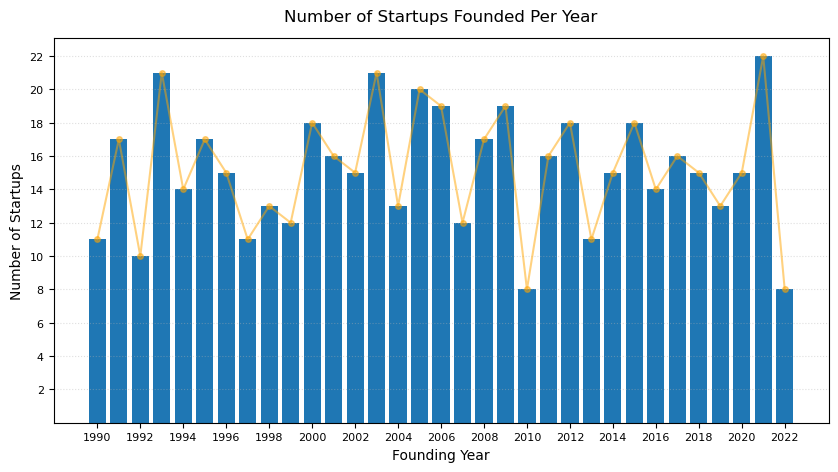

In [1432]:
founding_year, counts = np.unique(df['Year Founded'], return_counts = True)

plt.figure(figsize = (10, 5))
plt.bar(founding_year, counts)
plt.plot(founding_year, counts, color = 'orange', marker = 'o', alpha = 0.5,  markersize = 4)
plt.grid(True, axis = 'y', linestyle=":", alpha = 0.4)
plt.xticks(np.arange(1990, 2024, 2), fontsize =  8)
plt.yticks(np.arange(2, 24, 2), fontsize =  8)
plt.xlabel('Founding Year')
plt.ylabel('Number of Startups')
plt.title('Number of Startups Founded Per Year', pad = 12)
plt.show()

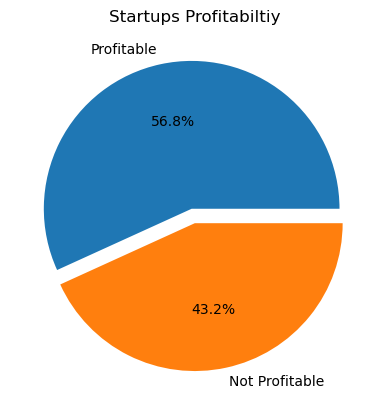

In [1434]:
profitability, counts = np.unique(df['Profitable'], return_counts = True)

plt.figure()
plt.pie(counts, labels = ['Profitable', 'Not Profitable'], explode = [0.1, 0], autopct = '%.1f%%')
plt.title('Startups Profitabiltiy', pad = 12)
plt.show()

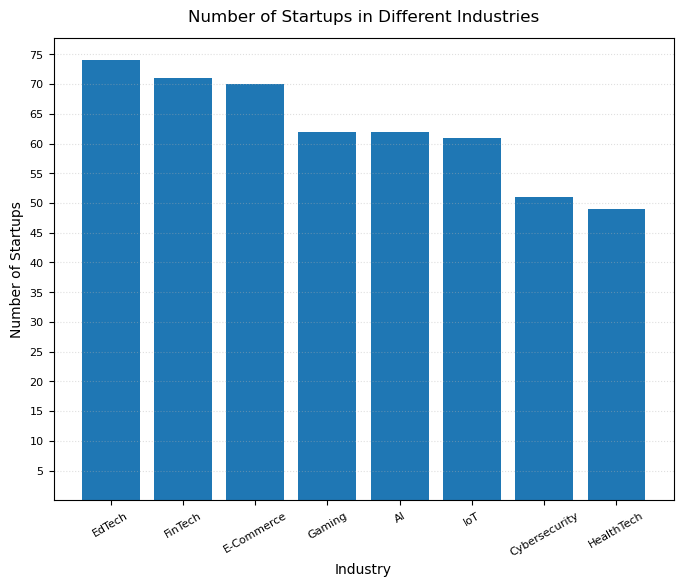

In [1436]:
df2 = df.reset_index()

industry, counts = np.unique(df2['Industry'], return_counts = True)

sorted_indices = np.argsort(counts)[::-1]
industry_sorted = industry[sorted_indices]
counts_sorted = counts[sorted_indices]

plt.figure(figsize = (8, 6))
plt.bar(industry_sorted, counts_sorted)
plt.grid(True, axis = 'y', linestyle=":", alpha=0.4)
plt.xticks(fontsize =  8, rotation = 30)
plt.yticks(np.arange(5, 80, 5), fontsize =  8)
plt.xlabel('Industry')
plt.ylabel('Number of Startups')
plt.title('Number of Startups in Different Industries', pad = 12)
plt.show()

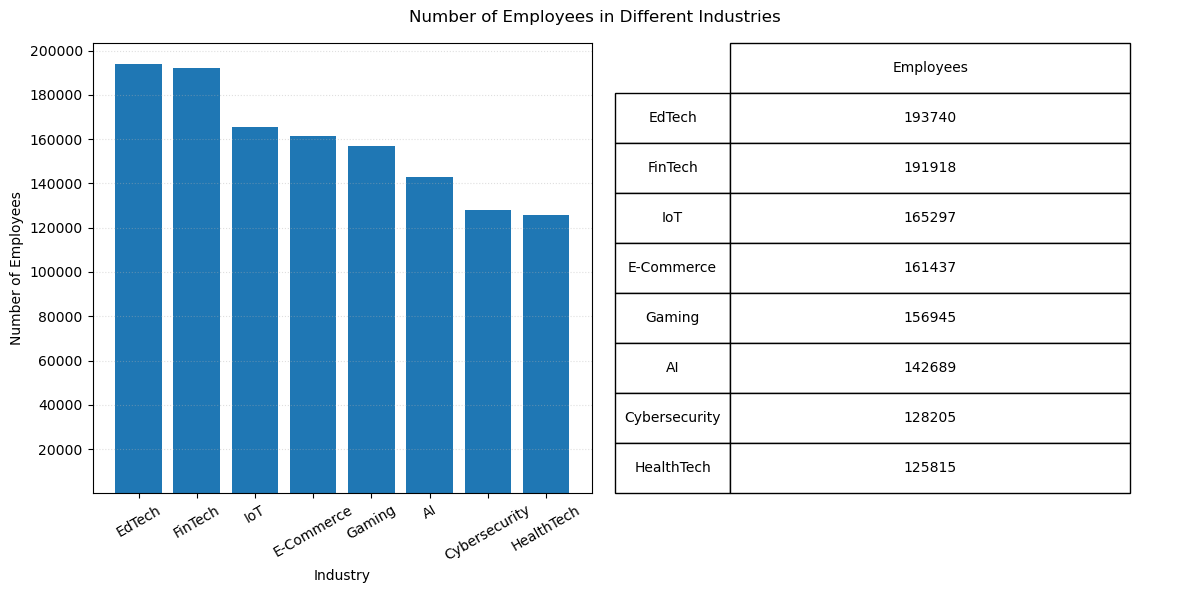

In [1438]:

dataframe = pd.DataFrame(df.groupby('Industry')['Employees'].sum()).sort_values(by = 'Employees', ascending = False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
fig.suptitle('Number of Employees in Different Industries')
ax1.bar(dataframe.index, dataframe['Employees'])
ax1.grid(True, axis = 'y', linestyle=":", alpha=0.4)
ax1.tick_params(labelsize =  10)
ax1.tick_params(axis = 'x', rotation = 30)
ax1.set_yticks(np.arange(20000, 220000, 20000))
ax1.set_xlabel('Industry')
ax1.set_ylabel('Number of Employees')
ax2.table(
    cellText = dataframe.values, 
    colLabels = dataframe.columns, 
    rowLabels = dataframe.index, 
    rowLoc = 'center',
    loc = 'center',
    cellLoc = 'center',
    bbox = [0.1, 0, 0.8, 1]
)
ax2.axis(False)
fig.tight_layout()
plt.show()

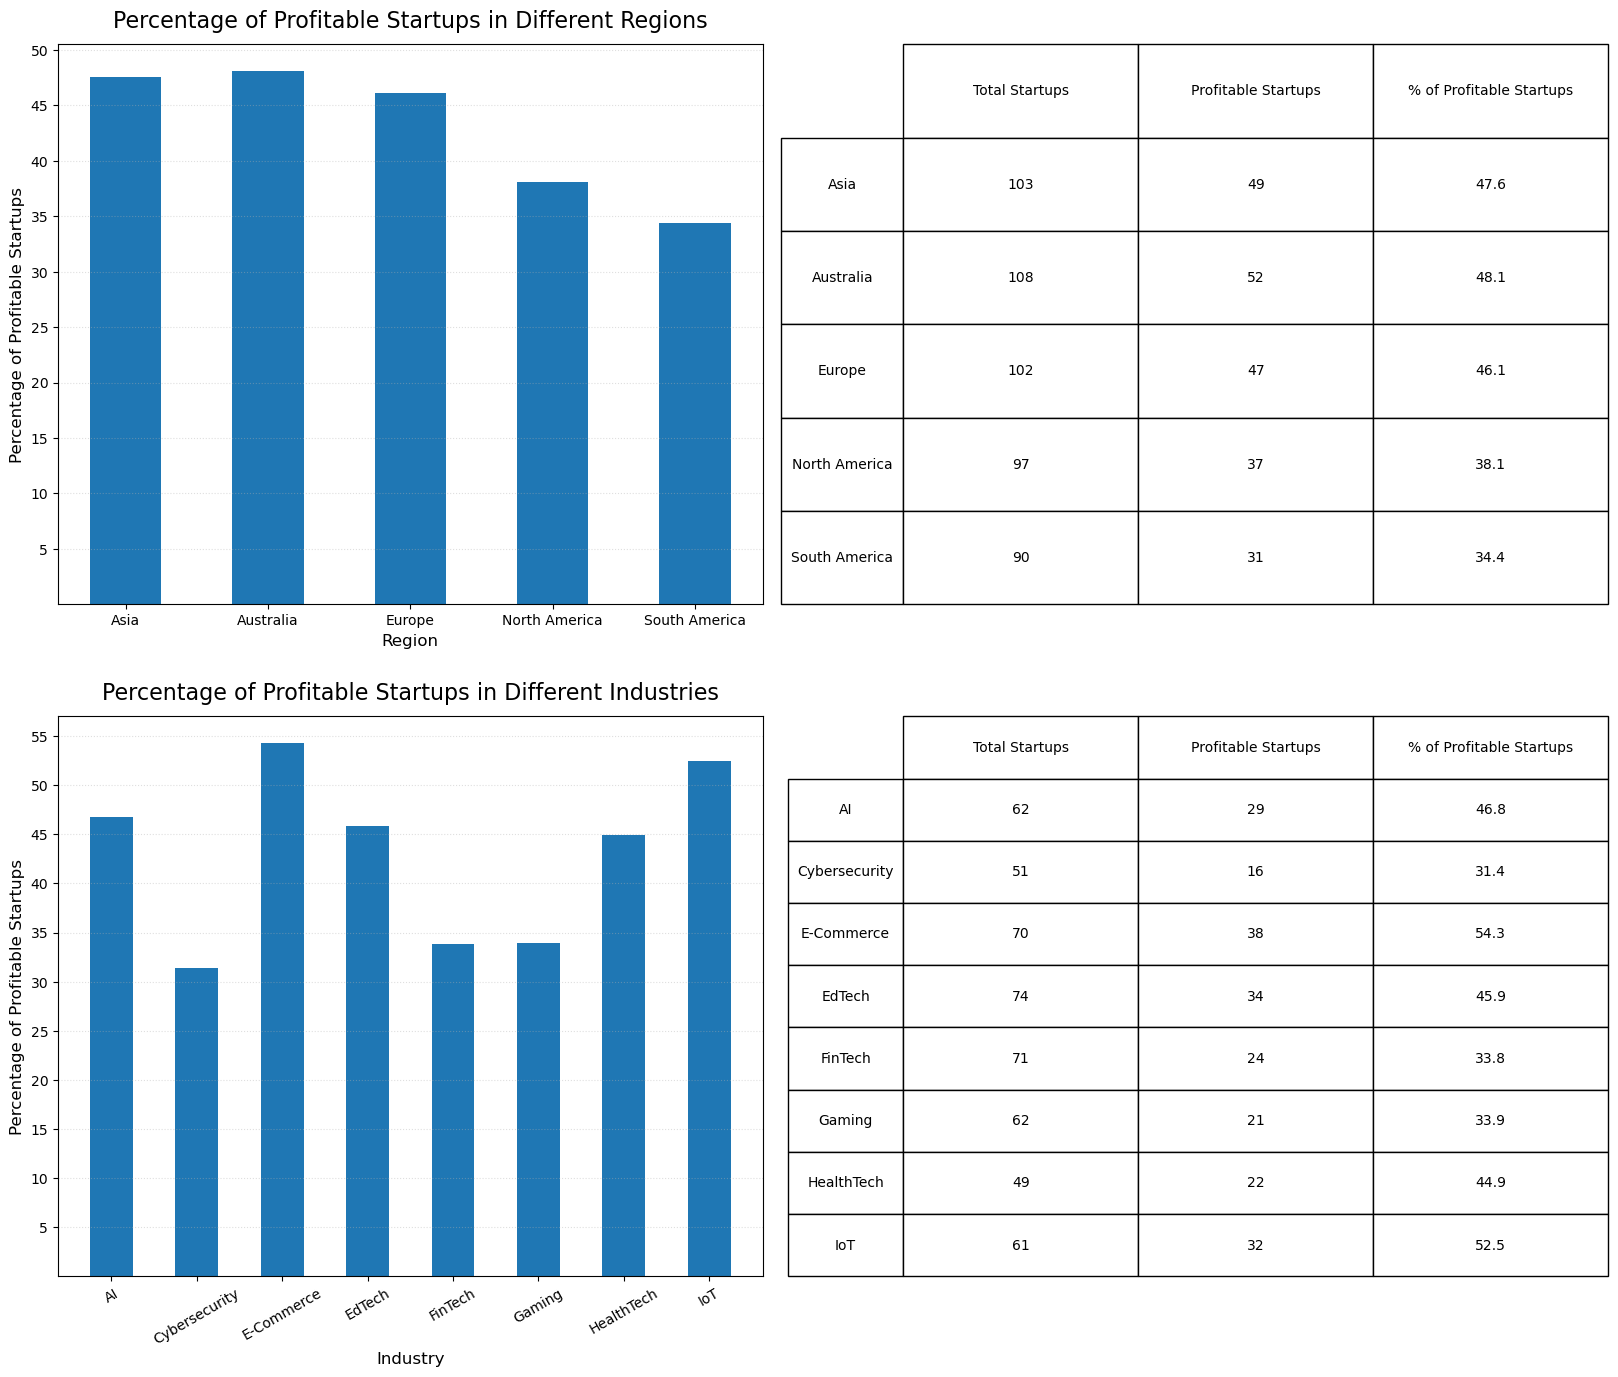

In [1440]:
data = {
    'Region': df.groupby('Region')['Profitable'].count().keys(),
    'Total Startups': df.groupby('Region')['Profitable'].count().values,
    'Profitable Startups': df[df['Profitable']].groupby('Region')['Profitable'].count().values,
    '% of Profitable Startups': (df[df['Profitable']].groupby('Region')['Profitable'].count().values / df.groupby('Region')['Profitable'].count().values) * 100
}

data2 = {
    'Industry': df.groupby('Industry')['Profitable'].count().keys(),
    'Total Startups': df.groupby('Industry')['Profitable'].count().values,
    'Profitable Startups': df[df['Profitable']].groupby('Industry')['Profitable'].count().values,
    '% of Profitable Startups': ((df[df['Profitable']].groupby('Industry')['Profitable'].count().values) / (df.groupby('Industry')['Profitable'].count().values)) * 100
}

dataFrame = pd.DataFrame(data)
dataFrame.set_index('Region', inplace = True)
dataFrame['% of Profitable Startups'] = dataFrame['% of Profitable Startups'].round(1)
dataFrame['Total Startups'] = dataFrame['Total Startups'].astype('str')

dataFrame2 = pd.DataFrame(data2)
dataFrame2.set_index('Industry', inplace = True)
dataFrame2['% of Profitable Startups'] = dataFrame2['% of Profitable Startups'].round(1)
dataFrame2['Total Startups'] = dataFrame2['Total Startups'].astype('str')

fig, ax = plt.subplots(2, 2, figsize=(20, 16))
ax[0, 0].bar(dataFrame.reset_index()['Region'], dataFrame['% of Profitable Startups'], width = 0.5)
ax[0, 0].grid(True, axis = 'y', linestyle=":", alpha=0.4)
ax[0, 0].set_xlabel('Region', fontsize = 12)
ax[0, 0].set_ylabel('Percentage of Profitable Startups', fontsize = 12)
ax[0, 0].set_yticks(np.arange(5, 55, 5))
ax[0, 0].set_title('Percentage of Profitable Startups in Different Regions', pad = 12, fontsize = 16)
ax[0, 1].table(
    cellText = dataFrame.values, 
    colLabels = dataFrame.columns, 
    rowLabels = dataFrame.index, 
    rowLoc = 'center', 
    loc = 'center', 
    cellLoc = 'center', 
    bbox = [0, 0, 1, 1]
)
ax[0, 1].axis(False)
ax[1, 0].bar(dataFrame2.reset_index()['Industry'], dataFrame2['% of Profitable Startups'], width = 0.5)
ax[1, 0].grid(True, axis = 'y', linestyle=":", alpha=0.4)
ax[1, 0].set_xlabel('Industry', fontsize = 12)
ax[1, 0].set_ylabel('Percentage of Profitable Startups', fontsize = 12)
ax[1, 0].tick_params(axis = 'x', rotation = 30)
ax[1, 0].set_yticks(np.arange(5, 60, 5))
ax[1, 0].set_title('Percentage of Profitable Startups in Different Industries', pad = 12, fontsize = 16)
ax[1, 1].table(
    cellText = dataFrame2.values, 
    colLabels = dataFrame2.columns, 
    rowLabels = dataFrame2.index, 
    rowLoc = 'center', 
    loc = 'center', 
    cellLoc = 'center', 
    bbox = [0, 0, 1, 1]
)
ax[1, 1].axis(False)
plt.show()